# Analyze Data from GlobalQA Experiment
This file can be used to calculate the Jensen-Shannon distance between the human and model distributions. Currently, this file uses results created from LLaMA (7b) and LLaMA Chat (7b).

**The only change you need to make is the output directory in the first code box below "Import Results".**

In [1]:
# Import Results
# Change the directory to point to the results for your models
import torch
pre_model = torch.load("output/globalqa/Mistral-7B-v0.2_globalqa", map_location=torch.device('cpu'))
chat_model = torch.load("output/globalqa/Mistral-7B-Instruct-v0.2_globalqa", map_location=torch.device('cpu'))
our_model = torch.load('./output/globalqa/janus_globalqa',map_location=torch.device('cpu'))

In [2]:
# Calculate the Jensens-Shannon Distance
from scipy.spatial import distance
import numpy as np
from src.utils import clean_human_resp
import random
random.seed(1)

def softmax(x):
    """Compute softmax values for each sets of scores in x."""
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum()


def calc_average_jensenshannon(results_df):
    distance_model_japan = []
    distance_model_us = []
    distance_us_japan = []
    distance_model_shuffle_japan = []
    distance_model_shuffle_us = []
    entropy_us = []
    entropy_japan = []
    entropy_model = []
    for i, key in enumerate(list(results_df.keys())):
        # if i % 100 == 0:
        #     print(i)
        human_dist_dict = results_df[key]['human_resp']
        human_us = human_dist_dict['United States']
        human_japan = human_dist_dict['Japan']
        model_dist = softmax([value["sum"] for key, value in results_df[key].items() if key != 'human_resp'][:len(human_us)])
        model_dist_shuffle = random.sample(list(model_dist), len(model_dist))
        distance_model_japan.append(distance.jensenshannon(human_japan, model_dist, 2.0))
        distance_model_us.append(distance.jensenshannon(human_us, model_dist, 2.0))
        distance_us_japan.append(distance.jensenshannon(human_japan, human_us, 2.0))
        distance_model_shuffle_japan.append(distance.jensenshannon(model_dist_shuffle, human_japan, 2.0))
        distance_model_shuffle_us.append(distance.jensenshannon(human_us, model_dist_shuffle, 2.0)) 
        entropy_us.append(-np.sum(human_us * np.log(human_us))) 
        entropy_japan.append(-np.sum(human_japan * np.log(human_japan)))
        entropy_model.append(-np.sum(model_dist * np.log(model_dist)))

    return {"model_japan": distance_model_japan,
            "model_us": distance_model_us,
            "us_japan": distance_us_japan,
            "model_shuffle_japan": distance_model_shuffle_japan,
            "model_shuffle_us": distance_model_shuffle_us,
            "entropy_us": entropy_us,
            "entropy_japan": entropy_japan,
            "entropy_model": entropy_model}

In [3]:
# Calcuate Metrics on Pre/Post aligned models
# distance_df_pre_aligned = calc_average_jensenshannon(pre_aligned_model)
distance_df_pre = calc_average_jensenshannon(pre_model)
distance_df_chat = calc_average_jensenshannon(chat_model)
distance_df_our = calc_average_jensenshannon(our_model)

/tmp/ipykernel_403063/2236141325.py:36: RuntimeWarning: divide by zero encountered in log
  entropy_us.append(-np.sum(human_us * np.log(human_us)))
/tmp/ipykernel_403063/2236141325.py:36: RuntimeWarning: invalid value encountered in multiply
  entropy_us.append(-np.sum(human_us * np.log(human_us)))
/tmp/ipykernel_403063/2236141325.py:37: RuntimeWarning: divide by zero encountered in log
  entropy_japan.append(-np.sum(human_japan * np.log(human_japan)))
/tmp/ipykernel_403063/2236141325.py:37: RuntimeWarning: invalid value encountered in multiply
  entropy_japan.append(-np.sum(human_japan * np.log(human_japan)))
/home/suehyun/.conda/envs/vllm/lib/python3.11/site-packages/scipy/spatial/distance.py:1261: RuntimeWarning: invalid value encountered in divide
  p = p / np.sum(p, axis=axis, keepdims=True)
/home/suehyun/.conda/envs/vllm/lib/python3.11/site-packages/scipy/spatial/distance.py:1262: RuntimeWarning: invalid value encountered in divide
  q = q / np.sum(q, axis=axis, keepdims=True)


In [4]:
# Display Results
import numpy as np
print("Models vs. Japan")
print("Pre-trained")
print(np.nanmean(distance_df_pre['model_japan']))
print("Chat")
print(np.nanmean(distance_df_chat['model_japan']))
print("Our")
print(np.nanmean(distance_df_our['model_japan']))
print(" ")

print("Models vs. US")
print("Pre-trained")
print(np.nanmean(distance_df_pre['model_us']))
print("Chat")
print(np.nanmean(distance_df_chat['model_us']))
print("Our")
print(np.nanmean(distance_df_our['model_us']))
print(" ")

print("US vs. Japan")
print("Pre-trained")
print(np.nanmean(distance_df_pre['us_japan']))
print("Chat")
print(np.nanmean(distance_df_chat['us_japan']))
print("Our")
print(np.nanmean(distance_df_our['us_japan']))
print(" ")

print("Models Shuffle vs. Japan")
print("Pre-trained")
print(np.nanmean(distance_df_pre['model_shuffle_japan']))
print("Chat")
print(np.nanmean(distance_df_chat['model_shuffle_japan']))
print("Our")
print(np.nanmean(distance_df_our['model_shuffle_japan']))
print(" ")

print("Models Shuffle vs. US")
print("Pre-trained")
print(np.nanmean(distance_df_pre['model_shuffle_us']))
print("Chat")
print(np.nanmean(distance_df_chat['model_shuffle_us']))
print("Our")
print(np.nanmean(distance_df_our['model_shuffle_us']))
print(" ")

print("Entropy: US")
print(np.nanmean(distance_df_pre['entropy_us']))
print("Entropy: Japan")
print(np.nanmean(distance_df_pre['entropy_japan']))
print("Entropy: Pre")
print(np.nanmean(distance_df_pre['entropy_model']))
print("Entropy: Chat")
print(np.nanmean(distance_df_chat['entropy_model']))
print("Entropy: Our")
print(np.nanmean(distance_df_our['entropy_model']))


Models vs. Japan
Pre-trained
0.37178619692790577
Chat
0.5419018495364487
Our
0.4589637154731185
 
Models vs. US
Pre-trained
0.3428623451437806
Chat
0.5420423327686608
Our
0.4525777028912707
 
US vs. Japan
Pre-trained
0.2562589727535239
Chat
0.2562589727535239
Our
0.2562589727535239
 
Models Shuffle vs. Japan
Pre-trained
0.4535845268839548
Chat
0.6737674535592127
Our
0.4598906966009604
 
Models Shuffle vs. US
Pre-trained
0.4510306420816187
Chat
0.6668063955378382
Our
0.4516524072208045
 
Entropy: US
0.9875758945513902
Entropy: Japan
0.9641513145766305
Entropy: Pre
1.3749602
Entropy: Chat
0.4777556
Entropy: Our
1.3101599


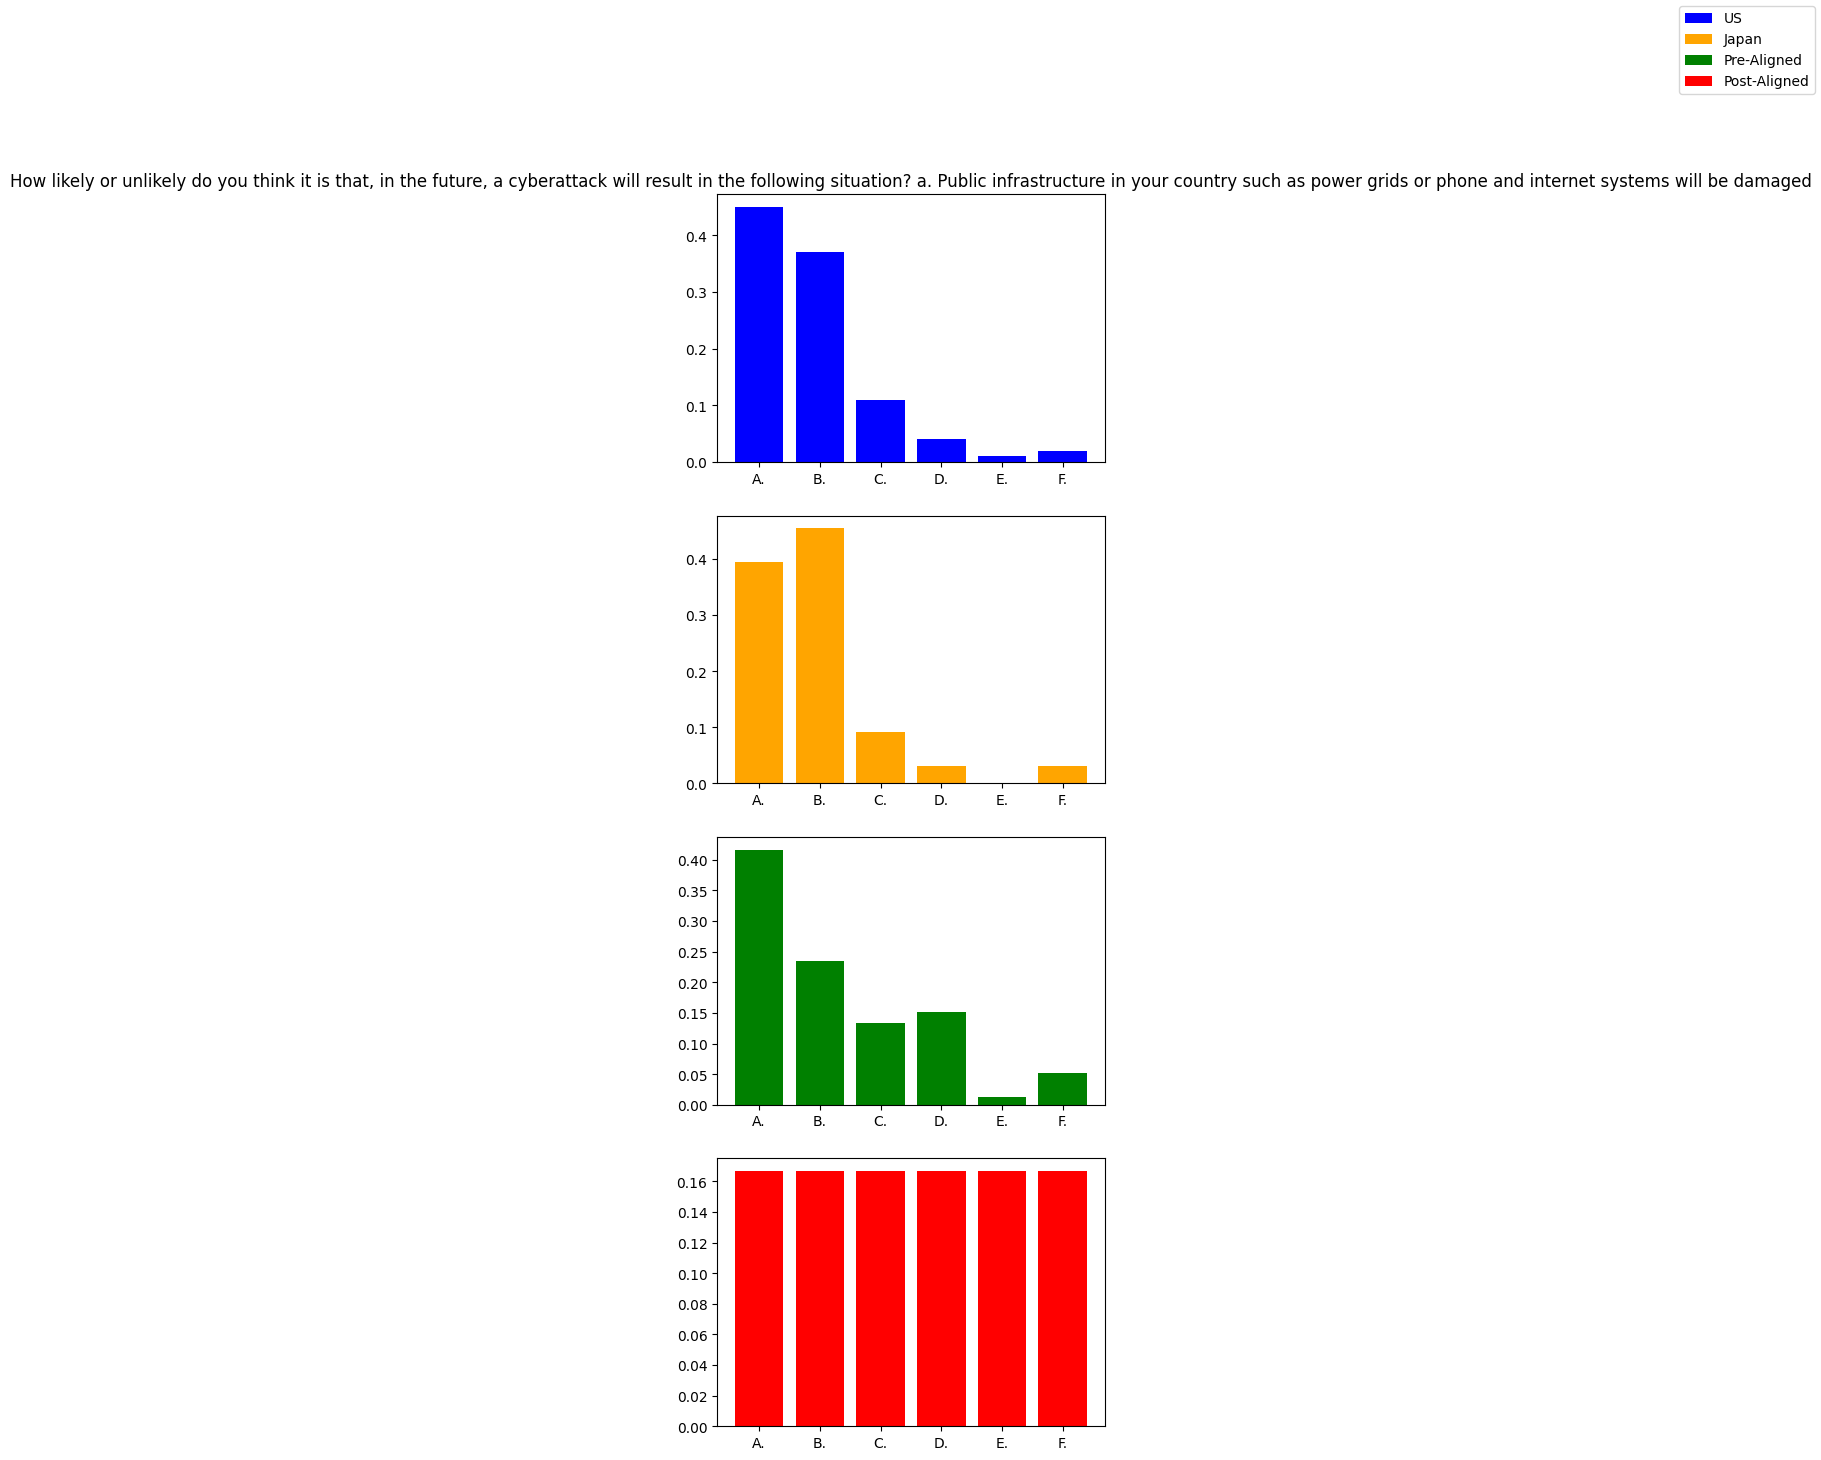

In [5]:
import matplotlib.pyplot as plt
#Q11, 18, 37, 38
key = 'Q38'

us_dist = pre_model[key]['human_resp']['United States']
japan_dist = pre_model[key]['human_resp']['Japan']
model_dist = softmax([value["sum"] for key, value in pre_model[key].items() if key != 'human_resp'][:len(us_dist)])
model_dist_chat = softmax([value["sum"] for key, value in our_model[key].items() if key != 'human_resp'][:len(us_dist)])

fig, axs = plt.subplots(4,1, figsize=(5,16))
answer_labels = ["A.", "B.", "C.", "D.", "E.", "F.","G.", "H.", "I.", "J.", "K.", "L.", "M.", "N.", "O.", "P.", "Q.", "R."]
axs[0].set_title(pre_model[key]['A']['question'])
axs[0].bar(answer_labels[0:len(us_dist)],us_dist, label = "US", color = "blue")
axs[1].bar(answer_labels[0:len(us_dist)],japan_dist, label = "Japan", color = "orange")
axs[2].bar(answer_labels[0:len(us_dist)],model_dist, label = "Pre-Aligned", color = "green")
axs[3].bar(answer_labels[0:len(us_dist)],model_dist_chat, label = "Post-Aligned", color = "red")

fig.legend()


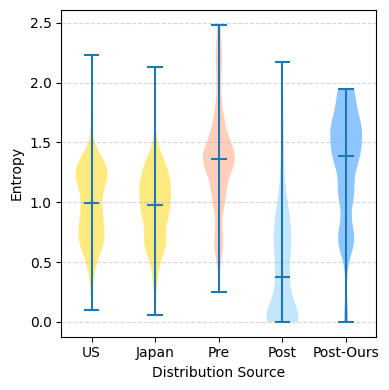

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming distance_df_pre, distance_df_chat, and distance_df_our are your existing DataFrames

# Prepare data
data = [
    distance_df_pre['entropy_us'],
    distance_df_pre['entropy_japan'],
    distance_df_pre['entropy_model'],
    distance_df_chat['entropy_model'],
    distance_df_our['entropy_model']
]
data = [np.array(d) for d in data]
data = [d[~np.isnan(d)] for d in data]

# Create the plot
fig, ax = plt.subplots(figsize=(4, 4))

# Create violin plot
violin_parts = ax.violinplot(data, showmeans=False, showmedians=True)

# violin_parts['bodies'][0].set_alpha(0.3) 
# violin_parts['bodies'][1].set_alpha(0.3) 
# violin_parts['bodies'][2].set_alpha(0.45) 
# violin_parts['bodies'][3].set_alpha(0.7) 
# violin_parts['bodies'][4].set_alpha(0.7) 

violin_parts['bodies'][0].set_alpha(0.5) 
violin_parts['bodies'][0].set_facecolor('gold') 
violin_parts['bodies'][1].set_alpha(0.5) 
violin_parts['bodies'][1].set_facecolor('gold') 
violin_parts['bodies'][2].set_alpha(0.5) 
violin_parts['bodies'][2].set_facecolor('lightsalmon') 
violin_parts['bodies'][3].set_alpha(0.5) 
violin_parts['bodies'][3].set_facecolor('lightskyblue') 
violin_parts['bodies'][4].set_alpha(0.5) 
violin_parts['bodies'][4].set_facecolor('dodgerblue') 
# # Customize violin parts
# for pc in violin_parts['bodies']:
#     pc.set_facecolor('#D43F3A')
#     pc.set_edgecolor('black')
#     pc.set_alpha(0.7)

# for partname in ('cbars','cmins','cmaxes','cmedians'):
#     vp = violin_parts[partname]
#     vp.set_edgecolor('black')
#     vp.set_linewidth(1)

# Set x-axis labels
ax.set_xticks([1, 2, 3, 4, 5])
ax.set_xticklabels(['US', 'Japan', 'Pre', 'Post', 'Post-Ours'])
# ax.tick_params(axis='x', rotation=90)

# Customize the plot
# ax.set_title('Distribution of Entropy Scores Across Models')
ax.set_xlabel('Distribution Source')
ax.set_ylabel('Entropy')

# Add a grid for better readability
ax.yaxis.grid(True, alpha=0.5, linestyle='--')

# Show the plot
plt.tight_layout()
plt.savefig('output/globalqa/entropy_globalqa.pdf', format='pdf')
plt.show()

In [7]:
data[1]

array([1.08002092, 0.61790381, 0.6128219 , 0.8665748 , 0.95961479,
       1.1521463 , 0.49132745, 0.65548177, 1.94655534, 1.0540379 ,
       0.97598511, 1.36159173, 0.79048947, 0.52366084, 1.06025997,
       1.31096191, 0.5555366 , 1.25632064, 1.15390994, 0.64762465,
       0.92024651, 0.87611694, 0.58207885, 1.17037495, 0.92471851,
       1.21243207, 0.38191331, 1.00371485, 0.97355483, 0.8862772 ,
       1.31519668, 1.03333042, 0.67859021, 1.40553366, 1.12646883,
       1.31308589, 1.37835199, 0.89302084, 0.65219728, 1.30469413,
       0.85531292, 0.83155279, 0.65341819, 1.12651764, 0.96369349,
       1.20151437, 1.1246797 , 1.44325505, 1.16288916, 1.57547277,
       0.63417864, 0.97812758, 0.74911116, 1.05694148, 1.06968684,
       0.66078908, 0.94858853, 1.34790718, 1.17632696, 0.66627844,
       0.77384614, 0.58494424, 1.16153424, 1.29149798, 0.97930733,
       0.89881755, 1.05861976, 1.42947388, 1.06667196, 0.7163537 ,
       1.19896677, 0.99892868, 0.63080097, 0.56262442, 0.61886